In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("IRIS.csv")

1. One-sample t-test

In [3]:
setosa_sepal_length = df[df["species"] == "Iris-setosa"]["sepal_length"]
t_stat, p_val = stats.ttest_1samp(setosa_sepal_length, 5.0)
print("\n1. One-sample t-test (Setosa sepal length = 5.0 cm)")
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")


1. One-sample t-test (Setosa sepal length = 5.0 cm)
T-statistic = 0.120, p-value = 0.90469


In [ ]:
alpha = 0.05
if p_val < alpha:
    print("✅ Reject H₀: Mean sepal length is significantly different from 5.0 cm.")
else:
    print("❌ Fail to Reject H₀: Mean sepal length is not significantly different from 5.0 cm.")

❌ Fail to Reject H₀: Mean sepal length is not significantly different from 5.0 cm.


2. Two-sample t-test

In [5]:
versicolor_petal_width = df[df["species"] == "Iris-versicolor"]["petal_width"]
virginica_petal_width = df[df["species"] == "Iris-virginica"]["petal_width"]
t_stat2, p_val2 = stats.ttest_ind(versicolor_petal_width, virginica_petal_width, equal_var=False)
print("\n2. Two-sample t-test (Versicolor vs Virginica petal width)")
print(f"T-statistic = {t_stat2:.3f}, p-value = {p_val2:.5e}")


2. Two-sample t-test (Versicolor vs Virginica petal width)
T-statistic = -14.625, p-value = 2.11153e-25


In [6]:
alpha = 0.05 # We’re willing to accept a 5% chance of incorrectly rejecting H₀  
if p_val < alpha:
    print("✅ Reject H₀: Petal widths differ significantly between Versicolor and Virginica.")
else:
    print("❌ Fail to Reject H₀: No significant difference in petal widths.")

❌ Fail to Reject H₀: No significant difference in petal widths.


3. Chi-Square Test of Independence

In [7]:
median_sepal_length = df["sepal_length"].median()
df["sepal_length_cat"] = df["sepal_length"].apply(lambda x: "Short" if x < median_sepal_length else "Long")
contingency_table = pd.crosstab(df["sepal_length_cat"], df["species"])
chi2, p_val3, dof, expected = stats.chi2_contingency(contingency_table)
print("\n3. Chi-Square Test (Sepal length category vs species)")
print(f"Chi2 = {chi2:.3f}, df = {dof}, p-value = {p_val3:.5e}")


3. Chi-Square Test (Sepal length category vs species)
Chi2 = 86.035, df = 2, p-value = 2.07894e-19


In [8]:
alpha = 0.05
if p_val < alpha:
    print("✅ Reject H₀: Sepal length category is dependent on species.")
else:
    print("❌ Fail to Reject H₀: Sepal length category is independent of species.")

❌ Fail to Reject H₀: Sepal length category is independent of species.


4. Correlation Test

In [9]:
corr, p_val4 = stats.pearsonr(df["sepal_length"], df["petal_length"])
print("\n4. Pearson Correlation (Sepal length vs Petal length)")
print(f"Correlation coefficient = {corr:.3f}, p-value = {p_val4:.5e}")



4. Pearson Correlation (Sepal length vs Petal length)
Correlation coefficient = 0.872, p-value = 1.03845e-47


In [10]:
alpha = 0.05
if p_val < alpha:
    print("✅ Reject H₀: Significant correlation exists between sepal length and petal length.")
else:
    print("❌ Fail to Reject H₀: No significant correlation.")

❌ Fail to Reject H₀: No significant correlation.


5. ANOVA

In [11]:
setosa_petal_length = df[df["species"] == "Iris-setosa"]["petal_length"]
versicolor_petal_length = df[df["species"] == "Iris-versicolor"]["petal_length"]
virginica_petal_length = df[df["species"] == "Iris-virginica"]["petal_length"]
f_stat, p_val5 = stats.f_oneway(setosa_petal_length, versicolor_petal_length, virginica_petal_length)
print("\n5. ANOVA (Petal length across species)")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val5:.5e}") 


5. ANOVA (Petal length across species)
F-statistic = 1179.034, p-value = 3.05198e-91


In [12]:
alpha = 0.05
if p_val < alpha:
    print("✅ Reject H₀: Mean petal lengths differ significantly across species.")
else:
    print("❌ Fail to Reject H₀: No significant difference in mean petal lengths.")

❌ Fail to Reject H₀: No significant difference in mean petal lengths.


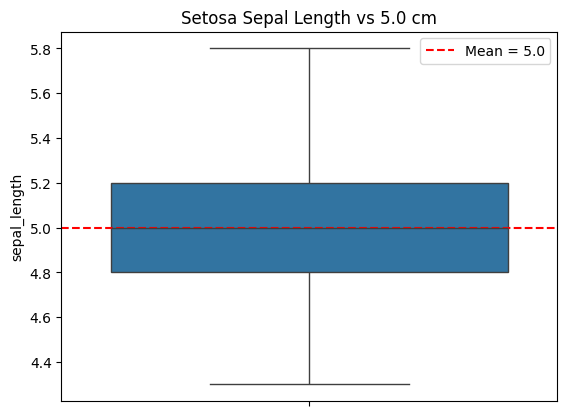

In [13]:
sns.boxplot(y=setosa_sepal_length)
plt.axhline(5.0, color="red", linestyle="--", label="Mean = 5.0")
plt.title("Setosa Sepal Length vs 5.0 cm")
plt.legend()
plt.show()

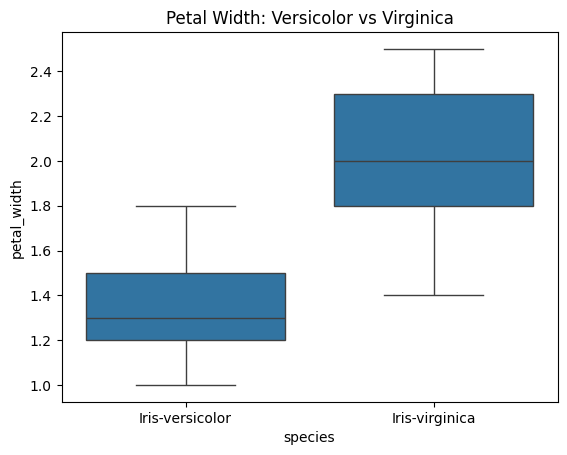

In [14]:
sns.boxplot(x="species", y="petal_width", data=df[df["species"].isin(["Iris-versicolor","Iris-virginica"])])
plt.title("Petal Width: Versicolor vs Virginica")
plt.show()


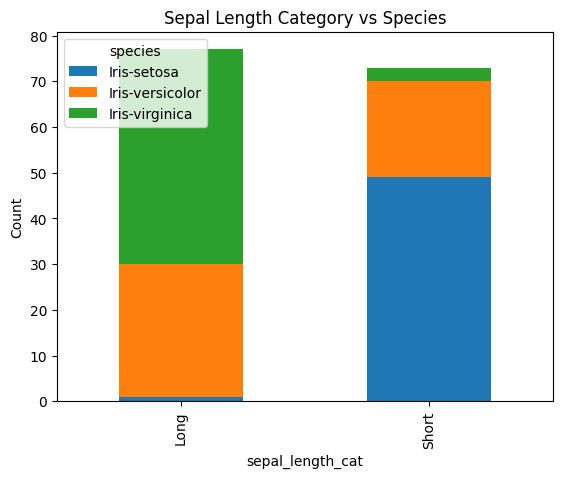

In [15]:
contingency_table.plot(kind="bar", stacked=True)
plt.title("Sepal Length Category vs Species")
plt.ylabel("Count")
plt.show()

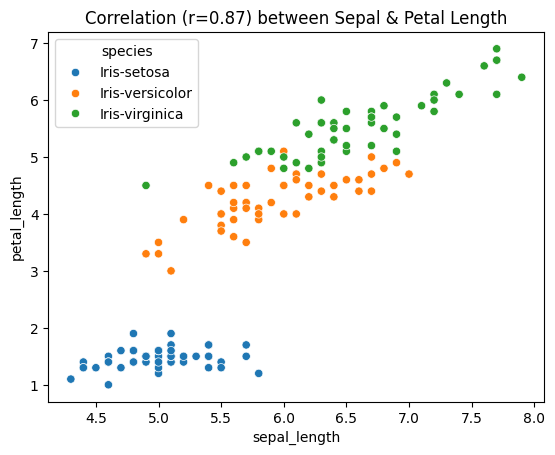

In [16]:
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df)
plt.title(f"Correlation (r={corr:.2f}) between Sepal & Petal Length")
plt.show()

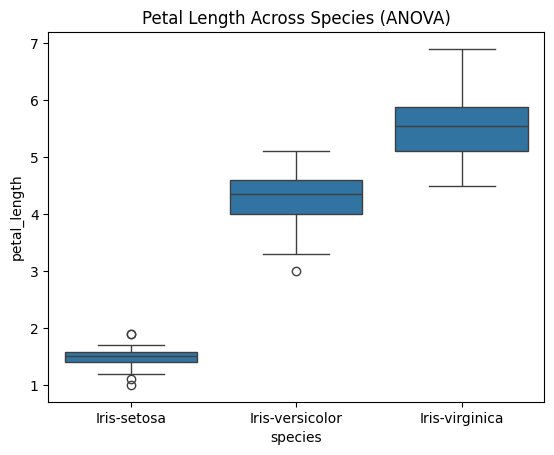

In [17]:
sns.boxplot(x="species", y="petal_length", data=df)
plt.title("Petal Length Across Species (ANOVA)")
plt.show()

PART B 


In [ ]:

x = float(input().strip())   # Probability of white first and black second
y = float(input().strip())   # Probability of white first

result = x / y

print(result)


1.0


In [ ]:
from scipy.stats import norm

m = float(input().strip())  # Mean
s = float(input().strip())  # Std deviation

# Z-score for cutoff 90
z = (90 - m) / s

# Probability of passing (X >= 90)
prob = 1 - norm.cdf(z)

print(round(prob, 2))


0.0


In [22]:
N = int(input())
print(f"{0.0 if N < 3 else (N-3)/(N-1):.4f}")


0.7778


In [25]:
import numpy as np, matplotlib.pyplot as plt, os
trials_list, max_rolls = [100,500,1000,5000,10000,50000,100000], 50
os.makedirs("dice_hist", exist_ok=True)

for rolls in range(2, max_rolls+1):
    for t in trials_list:
        s = np.random.randint(1,7,(t,rolls)).sum(1)
        plt.hist(s, bins=30, edgecolor="k"); m,v = s.mean(), s.var()
        plt.title(f"Rolls={rolls}, Trials={t}\nMean={m:.2f}, Var={v:.2f}")
        plt.savefig(f"dice_hist/r{rolls}_t{t}.png"); plt.close()
        print(f"Rolls={rolls}, Trials={t}, Mean={m:.2f}, Var={v:.2f}")


Rolls=2, Trials=100, Mean=6.89, Var=6.54
Rolls=2, Trials=500, Mean=6.85, Var=5.87
Rolls=2, Trials=1000, Mean=6.96, Var=5.61
Rolls=2, Trials=5000, Mean=6.99, Var=5.91
Rolls=2, Trials=10000, Mean=6.97, Var=5.80
Rolls=2, Trials=50000, Mean=6.99, Var=5.80
Rolls=2, Trials=100000, Mean=7.00, Var=5.85
Rolls=3, Trials=100, Mean=10.33, Var=8.66
Rolls=3, Trials=500, Mean=10.42, Var=9.35
Rolls=3, Trials=1000, Mean=10.49, Var=9.05
Rolls=3, Trials=5000, Mean=10.53, Var=8.83
Rolls=3, Trials=10000, Mean=10.53, Var=8.74
Rolls=3, Trials=50000, Mean=10.48, Var=8.79
Rolls=3, Trials=100000, Mean=10.51, Var=8.76
Rolls=4, Trials=100, Mean=14.25, Var=11.55
Rolls=4, Trials=500, Mean=14.03, Var=11.80
Rolls=4, Trials=1000, Mean=14.22, Var=11.88
Rolls=4, Trials=5000, Mean=13.94, Var=11.89
Rolls=4, Trials=10000, Mean=13.97, Var=11.81
Rolls=4, Trials=50000, Mean=14.03, Var=11.61
Rolls=4, Trials=100000, Mean=14.00, Var=11.73
Rolls=5, Trials=100, Mean=17.86, Var=13.62
Rolls=5, Trials=500, Mean=17.56, Var=13.49
Rolls

C:\Users\ABC\AppData\Local\Temp\ipykernel_21244\735157502.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  posterior /= np.trapz(posterior, p_grid)  # normalize


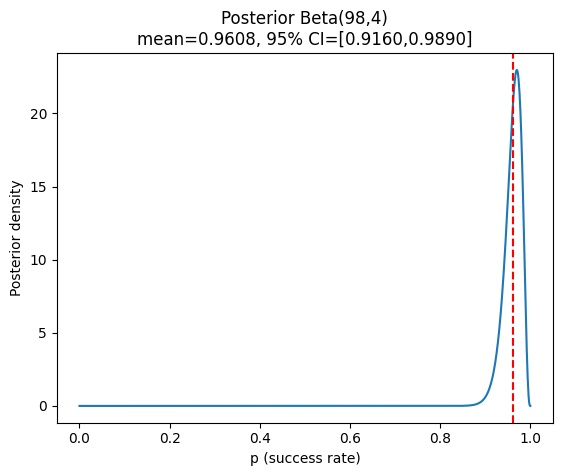

MLE = 0.970
Posterior mean = 0.9608
95% credible interval = [0.9160, 0.9890]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math, os

n, k = 100, 97
p_grid = np.linspace(0, 1, 1001)
p_candidates = [0.80, 0.85, 0.90, 0.95, 0.97, 0.99]
outdir = "binomial_analysis"
os.makedirs(outdir, exist_ok=True)

def binom_pmf(k, n, p):
    return math.comb(n, k) * (p**k) * ((1 - p)**(n - k))

# 1. PMFs for candidate p values
counts = np.arange(0, n + 1)
for p in p_candidates:
    pmf = [binom_pmf(c, n, p) for c in counts]
    plt.figure(figsize=(6, 4))
    plt.bar(counts, pmf, edgecolor="black")
    plt.axvline(k, linestyle="--", color="red")
    plt.title(f"Binomial PMF (n={n}, p={p}) — observed k={k}")
    plt.xlabel("Positive reviews")
    plt.ylabel("Probability")
    plt.savefig(f"{outdir}/pmf_p{int(p*100)}.png", dpi=120)
    plt.close()

likelihood = [binom_pmf(k, n, p) for p in p_grid]
plt.plot(p_grid, likelihood)
plt.axvline(k/n, linestyle="--", color="red")
plt.title(f"Likelihood for n={n}, k={k} (MLE={k/n:.2f})")
plt.xlabel("p (success rate)")
plt.ylabel("Likelihood")
plt.savefig(f"{outdir}/likelihood.png", dpi=120)
plt.close()

# 3. Posterior with uniform prior = Beta(k+1, n-k+1)
a, b = k + 1, n - k + 1
posterior = (p_grid**(a-1)) * ((1-p_grid)**(b-1))
posterior /= np.trapz(posterior, p_grid)  # normalize
post_mean = a / (a + b)

cdf = np.cumsum(posterior)
cdf /= cdf[-1]
ci_low = p_grid[np.searchsorted(cdf, 0.025)]
ci_high = p_grid[np.searchsorted(cdf, 0.975)]

plt.plot(p_grid, posterior)
plt.axvline(post_mean, linestyle="--", color="red")
plt.title(f"Posterior Beta({a},{b})\nmean={post_mean:.4f}, 95% CI=[{ci_low:.4f},{ci_high:.4f}]")
plt.xlabel("p (success rate)")
plt.ylabel("Posterior density")
plt.show()

print(f"MLE = {k/n:.3f}")
print(f"Posterior mean = {post_mean:.4f}")
print(f"95% credible interval = [{ci_low:.4f}, {ci_high:.4f}]")